# Task 3

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def display_img(img):
    new_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()


## Task 3.1

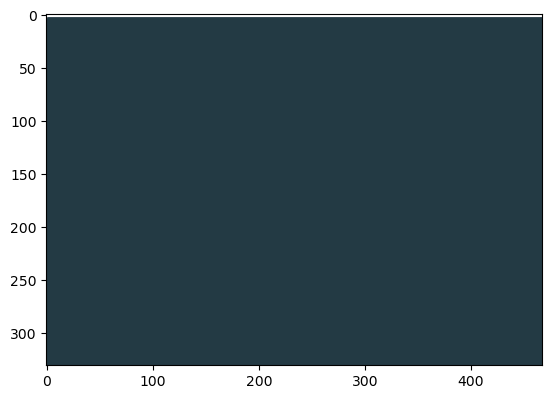

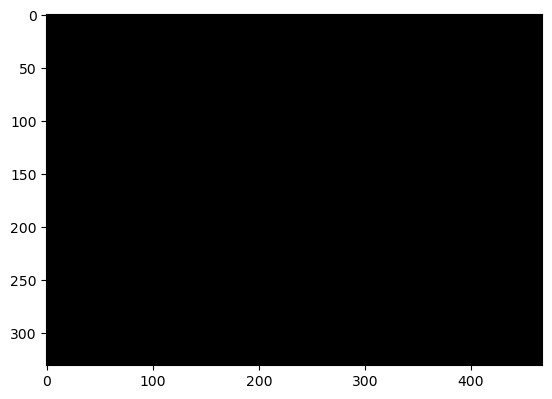

No red line detected in the image.


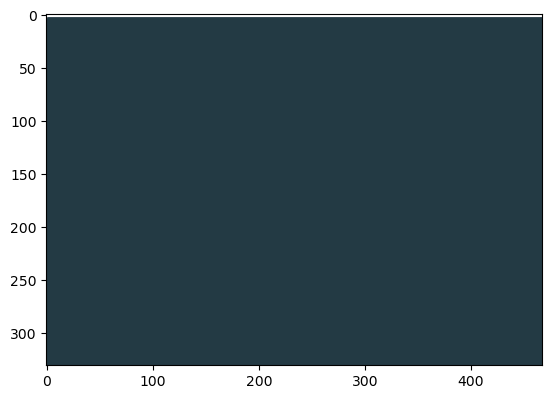

(331, 468, 3)

In [29]:
image = cv.imread('./task-assets/Screenshot 2023-09-03 143520.png')

display_img(image)

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# display_img(hsv_image)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
# Create a mask to threshold the image for red color
mask = cv.inRange(hsv_image, lower_red, upper_red)
display_img(mask)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Initialize a variable to store the distance from the bottom border
distance_from_bottom = -1  # Default value if no red line is found

for contour in contours:
    # Get the bounding box of the contour
    # x -> top left corner // y -> top left corner// w -> width of the bounding rectangle // h -> height ....
    x, y, w, h = cv.boundingRect(contour) 
    # Calculate the distance from the bottom border
    distance = image.shape[0] - (2*y+ h)//2       
    # Check if this is the closest red line to the bottom
    if distance_from_bottom == -1 or distance > distance_from_bottom:
        distance_from_bottom = distance

# Check if a red line was found
if distance_from_bottom != -1:
    print(f"Red line detected! Distance from the bottom border: {distance_from_bottom} pixels.")
else:
    print("No red line detected in the image.")

# Display the image with the detected contours (for visualization)
cv.drawContours(image, contours, -1, (0, 255, 0), 2)
display_img(image)

image.shape

In [16]:
import tkinter as tk
from tkinter import colorchooser

def pick_color():
    color = colorchooser.askcolor(title="Pick a Color")
    if color[1]:  # Check if a color was chosen
        selected_color_label.config(bg=color[1])
        selected_color_label.config(text=color[1])

# Create the main application window
app = tk.Tk()
app.title("Color Picker")

# Create a label to display the selected color
selected_color_label = tk.Label(app, text="Selected Color", padx=20, pady=10)
selected_color_label.pack()

# Create a button to open the color picker dialog
pick_color_button = tk.Button(app, text="Pick a Color", command=pick_color)
pick_color_button.pack()

# Run the application
app.mainloop()


## Task 3.2